# Importing Requried Libraries

In [1]:
import json
import re
import matplotlib.pyplot as plt
import numpy as np
import csv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## Data Loading
Here we load the data from the csv file and create a dictionary of text and label 

In [2]:
csv_file_path = '/home/jovyan/NLP/Data/AI_Human.csv'

data = []

with open(csv_file_path, mode='r', encoding='utf-8') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    for row in csv_reader:
        row_dict = {
            "text": row["text"],
            "generated": float(row["generated"])  
        }
        data.append(row_dict)

In [3]:
# This is our labels
label = {"AI": 1.0, "Human": 0.0}

## Count AI vs Human Texts

In [4]:
count_ai = 0
count_human = 0
for text_type in data:
    if text_type['generated'] == 1.0:
        count_ai += 1
    else:
        count_human += 1
print("Train AI: ", count_ai)
print("Train Human: ", count_human)

Train AI:  181438
Train Human:  305797


## Filter Text Characters

First, find_not_text function will identify non-text characters in a given text. It then iterates through the dataset, categorizing each text entry based on the presence of non-text characters and storing the indices accordingly. Finally, we separate and stores AI and human samples with only text characters into two lists.

In [5]:
def find_non_text(text):
    non_text_pattern = re.compile(r"[^a-zA-Z\s,.!'\"\-]")
    return non_text_pattern.findall(text)

In [6]:
non_text_pattern_indices = []
text_pattern_indicies = []
for idx, text in enumerate(data):
    if find_non_text(text['text']):
        non_text_pattern_indices.append(idx)
    else:
        text_pattern_indicies.append(idx)
print("Total number of texts: ", len(data))
print("Number of texts with text characters: ", len(text_pattern_indicies))
print("Number of texts with non-text characters: ", len(non_text_pattern_indices))

Total number of texts:  487235
Number of texts with text characters:  126291
Number of texts with non-text characters:  360944


In [7]:
ai_samples = sum(1 for idx in text_pattern_indicies if data[idx]['generated'] == 1.0)
human_samples = sum(1 for idx in text_pattern_indicies if data[idx]['generated'] == 0.0)
print("Number of AI samples with only text characters: ", ai_samples)
print("Number of human samples with only text characters: ", human_samples)

Number of AI samples with only text characters:  71644
Number of human samples with only text characters:  54647


In [8]:
ai_samples = []
human_samples = []
for entry in data:
    if not find_non_text(entry['text']):
        if entry['generated'] == 1.0:
            ai_samples.append(entry)    
        elif entry['generated'] == 0.0:
            human_samples.append(entry)

## Analyzing Text Lengths and Distributions

Here we are calculating the average and median lengths of AI-generated and human-generated text samples. We then visualize the distribution of text lengths for both AI and human samples using histograms, highlighting the mean and median values.

In [9]:
average_length_ai = sum(len(text['text'].split(" ")) for text in ai_samples) / len(ai_samples)
average_length_human = sum(len(text['text'].split(" ")) for text in human_samples) / len(human_samples)
print("Average length of AI samples: ", average_length_ai)
print("Average length of human samples: ", average_length_human)

Average length of AI samples:  304.7978895650717
Average length of human samples:  368.4461910077406


In [10]:
average_median_ai = np.median([len(text['text'].split(" ")) for text in ai_samples])
average_median_human = np.median([len(text['text'].split(" ")) for text in human_samples])
print("Median length of AI samples: ", average_median_ai)
print("Median length of human samples: ", average_median_human)

Median length of AI samples:  309.0
Median length of human samples:  327.0


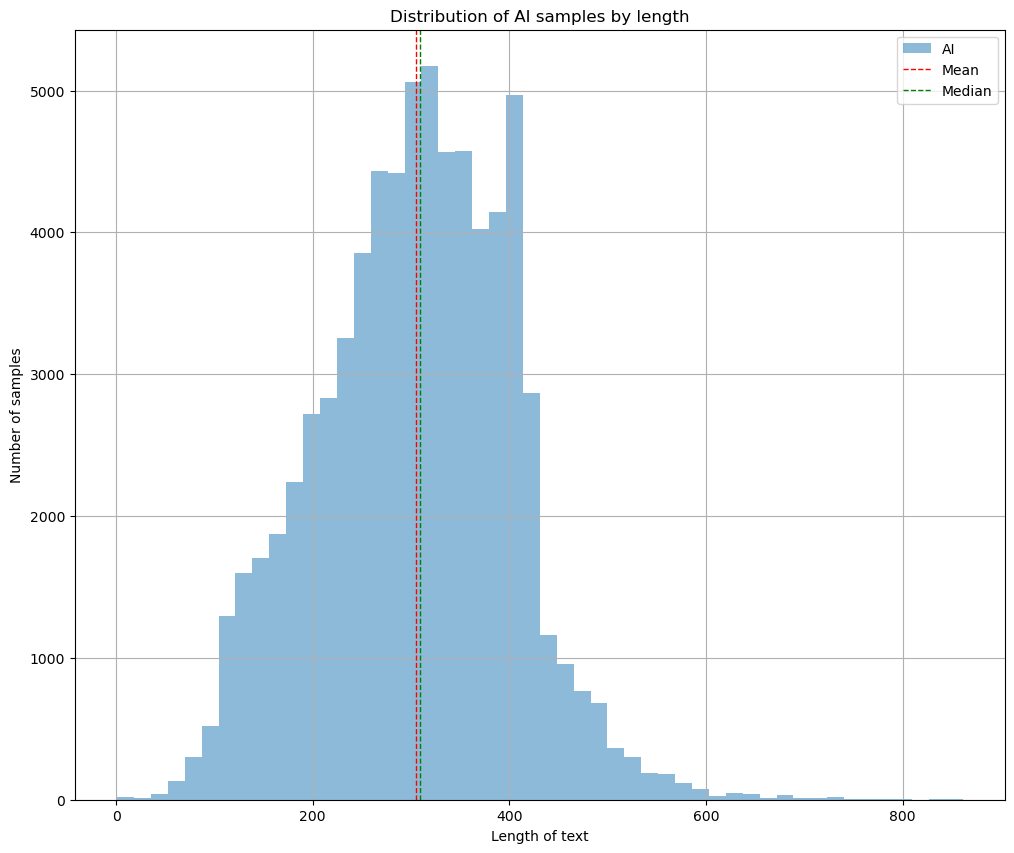

In [11]:
plt.figure(figsize=(12, 10))
plt.hist([len(text['text'].split(" ")) for text in ai_samples], bins=50, alpha=0.5, label='AI')
plt.axvline(average_length_ai, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(average_median_ai, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.title("Distribution of AI samples by length")
plt.xlabel("Length of text")
plt.ylabel("Number of samples")
plt.legend()
plt.grid()
plt.show()

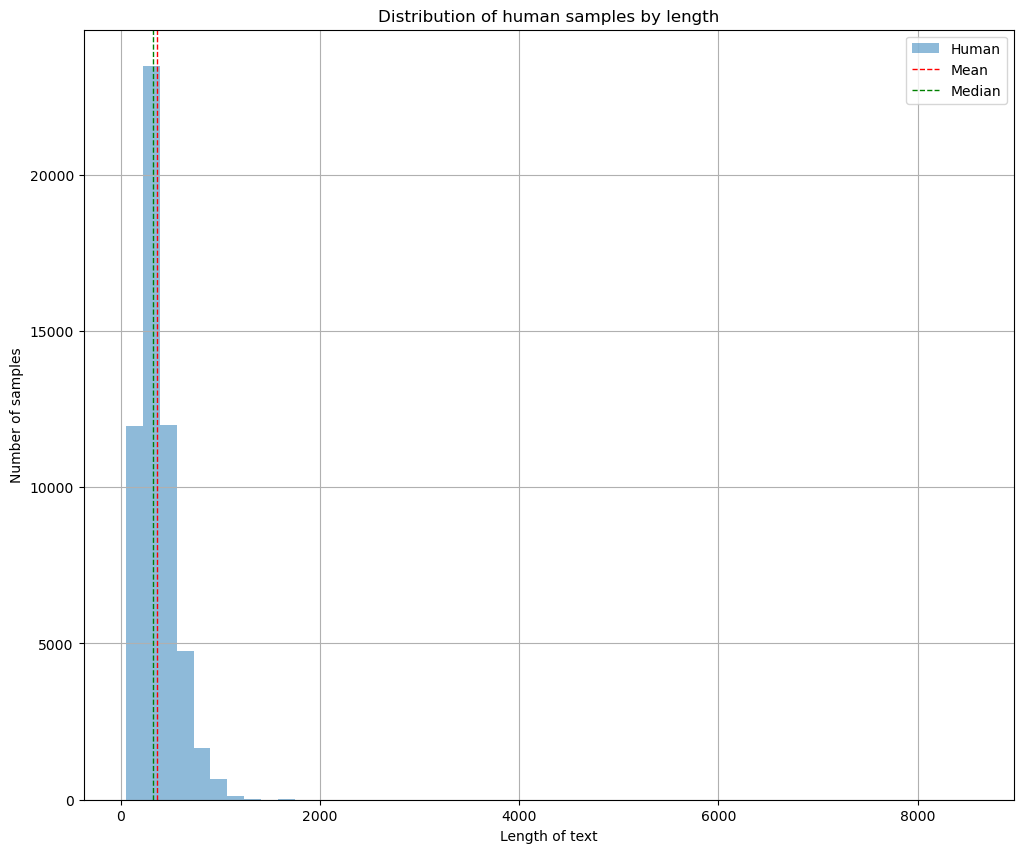

In [12]:
plt.figure(figsize=(12, 10))
plt.hist([len(text['text'].split(" ")) for text in human_samples], bins=50, alpha=0.5, label='Human')
plt.axvline(average_length_human, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(average_median_human, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.title("Distribution of human samples by length")
plt.xlabel("Length of text")
plt.ylabel("Number of samples")
plt.legend()
plt.grid()
plt.show()

## Process Text Samples and Add Sequence Tags

Here we process the AI-generated and human-generated text samples by first combining text entries. We then remove stopwords from the text and add sequence tags around paragraphs. The processed texts are stored in separate lists for AI and human samples, both with and without stopwords.

In [13]:
human_text = []
for sample in human_samples:
    combined_essay = ''.join(sample['text'])
    human_text.append({"text": combined_essay})

In [14]:
ai_text = []
for sample in ai_samples:
    combined_essay = ''.join(sample['text'])
    ai_text.append({"text": combined_essay})

In [15]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

In [16]:
def add_sequence_tags(text):
    paragraphs = text.split("\n\n\n")
    paragraphs_with_tags = []
    for paragraph in paragraphs:
        paragraph_with_tags = "<s>" + paragraph.strip() + "</s>"
        paragraphs_with_tags.append(paragraph_with_tags)
    return paragraphs_with_tags

In [17]:
ai_text_with_stopwords = []
ai_text_without_stopwords = []
for sample in ai_samples:
    combined_essay = ''.join(sample['text'])
    filtered_text = remove_stopwords(combined_essay)
    tagged_text_with_stopwords = add_sequence_tags(combined_essay)
    tagged_text_without_stopwords = add_sequence_tags(filtered_text)
    ai_text_with_stopwords.append({"text": tagged_text_with_stopwords})
    ai_text_without_stopwords.append({"text": tagged_text_without_stopwords})

In [18]:
human_text_with_stopwords = []
human_text_without_stopwords = []
for sample in human_samples:
    combined_essay = ''.join(sample['text'])
    filtered_text = remove_stopwords(combined_essay)
    tagged_text_with_stopwords = add_sequence_tags(combined_essay)
    tagged_text_without_stopwords = add_sequence_tags(filtered_text)
    human_text_with_stopwords.append({"text": tagged_text_with_stopwords})
    human_text_without_stopwords.append({"text": tagged_text_without_stopwords})

## Analyzing Text Lengths Without Stopwords and Visualize Distributions

Here we calculate the average and median lengths of AI-generated and human-generated text samples after removing stopwords. We then visualize the distribution of these text lengths using histograms, highlighting the mean and median values for both AI and human samples.

In [19]:
average_length_ai_without_stopwords = sum(len(text['text'][0].split(" ")) for text in ai_text_without_stopwords) / len(ai_text_without_stopwords)
average_length_human_without_stopwords = sum(len(text['text'][0].split(" ")) for text in human_text_without_stopwords) / len(human_text_without_stopwords)
print("Average length of AI samples without stopwords: ", average_length_ai_without_stopwords)
print("Average length of human samples without stopwords: ", average_length_human_without_stopwords)

Average length of AI samples without stopwords:  206.76313438668976
Average length of human samples without stopwords:  218.29860742584222


In [20]:
average_median_ai_without_stopwords = np.median([len(text['text'][0].split(" ")) for text in ai_text_without_stopwords])
average_median_human_without_stopwords = np.median([len(text['text'][0].split(" ")) for text in human_text_without_stopwords])
print("Median length of AI samples without stopwords: ", average_median_ai_without_stopwords)
print("Median length of human samples without stopwords: ", average_median_human_without_stopwords)

Median length of AI samples without stopwords:  211.0
Median length of human samples without stopwords:  194.0


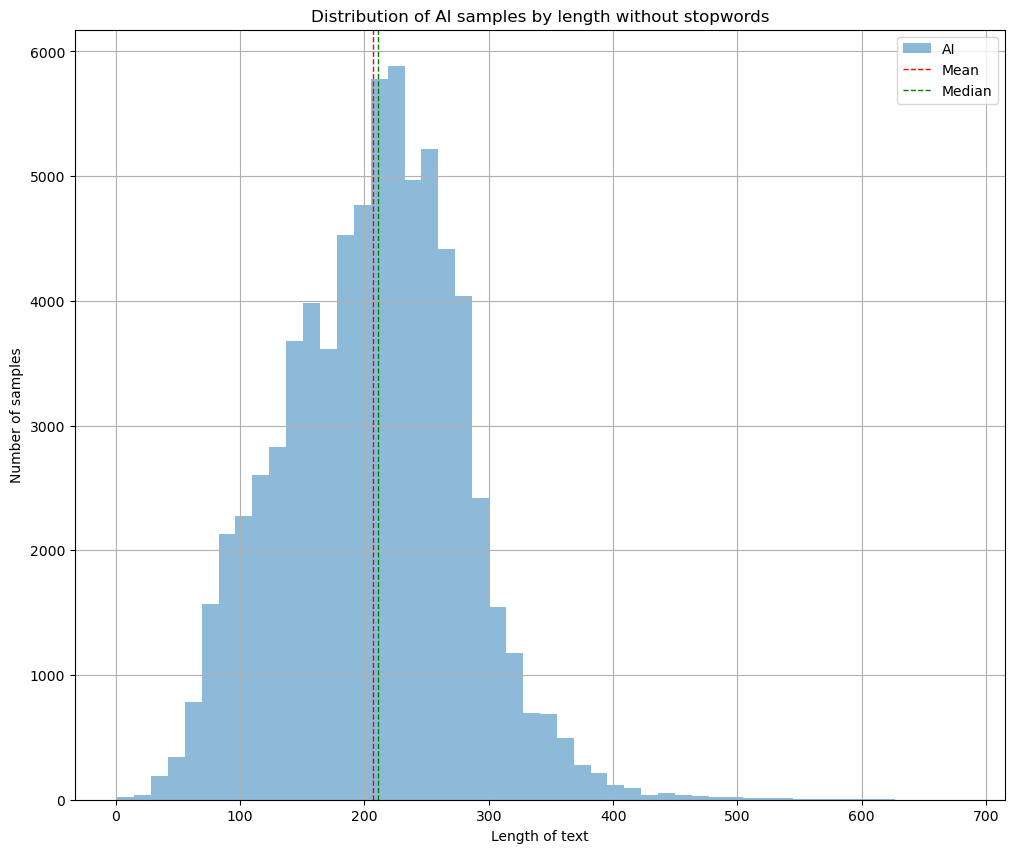

In [21]:
plt.figure(figsize=(12, 10))
plt.hist([len(text['text'][0].split(" ")) for text in ai_text_without_stopwords], bins=50, alpha=0.5, label='AI')
plt.axvline(average_length_ai_without_stopwords, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(average_median_ai_without_stopwords, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.title("Distribution of AI samples by length without stopwords")
plt.xlabel("Length of text")
plt.ylabel("Number of samples")
plt.legend()
plt.grid()
plt.show()

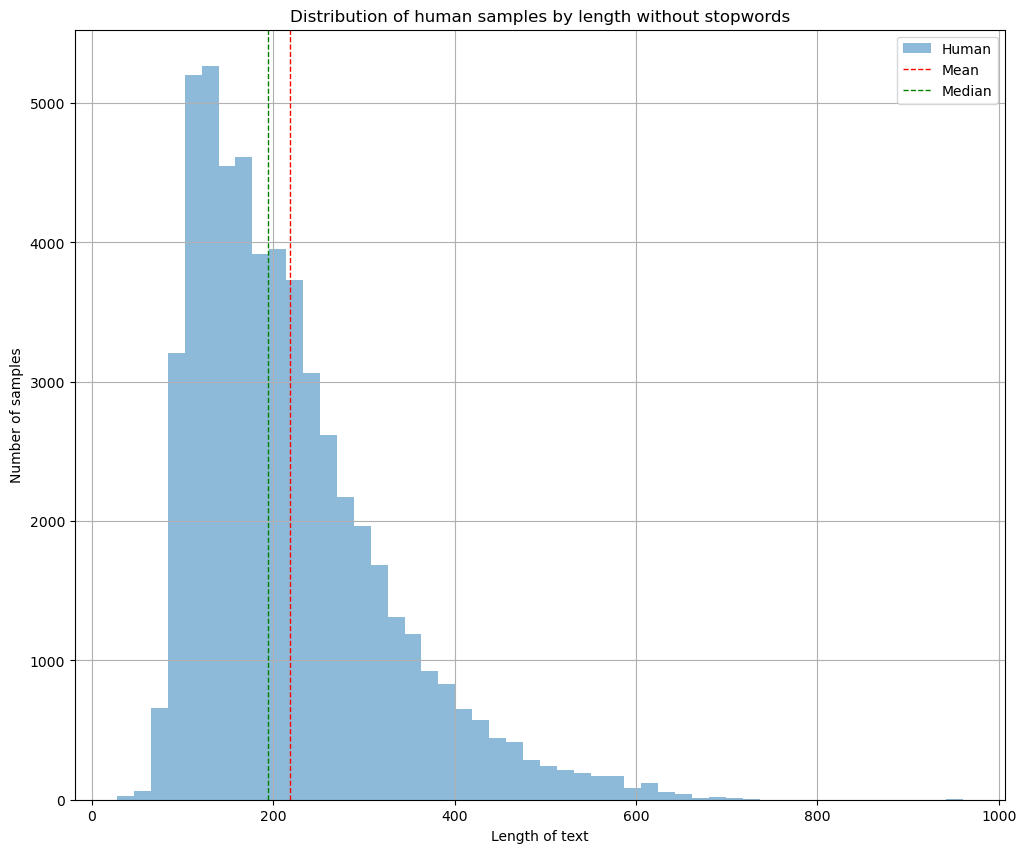

In [22]:
plt.figure(figsize=(12, 10))
plt.hist([len(text['text'][0].split(" ")) for text in human_text_without_stopwords], bins=50, alpha=0.5, label='Human')
plt.axvline(average_length_human_without_stopwords, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(average_median_human_without_stopwords, color="g", linestyle='dashed', linewidth=1, label='Median')
plt.title("Distribution of human samples by length without stopwords")
plt.xlabel("Length of text")
plt.ylabel("Number of samples")
plt.legend()
plt.grid()
plt.show()

## Saving Processed Text Samples to Files

Here we save the processed AI-generated and human-generated text samples, both with and without stopwords, to JSON files. 

In [23]:
with open('/home/jovyan/NLP/Data/processed_human_samples_with_stopwords.json', 'w') as outfile:
    json.dump(human_text_with_stopwords, outfile, indent=4)

with open('/home/jovyan/NLP/Data/processed_human_samples_without_stopwords.json', 'w') as outfile:
    json.dump(human_text_without_stopwords, outfile, indent=4)

with open('/home/jovyan/NLP/Data/processed_ai_samples_with_stopwords.json', 'w') as outfile:
    json.dump(ai_text_with_stopwords, outfile, indent=4)

with open('/home/jovyan/NLP/Data/processed_ai_samples_without_stopwords.json', 'w') as outfile:
    json.dump(ai_text_without_stopwords, outfile, indent=4)

print("Stop words removed, tags added, and files saved successfully.")

Stop words removed, tags added, and files saved successfully.
